#### Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

#### Loading the dataset (163MB) 

In [2]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

#### Data Visualization

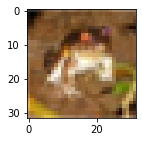

In [5]:
plt.figure(figsize = (10,2))
plt.imshow(X_train[0])

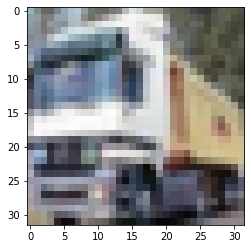

In [6]:
plt.imshow(X_train[1])

#### Define the classes

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

#### Data Preprocessing

##### Scale images

In [9]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [10]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [11]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [12]:
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

#### Initializing the ANN

In [13]:
model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')    
        ])


#### Compiling the ANN

In [14]:
model.compile(optimizer='SGD',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

#### Training the ANN on the Training set

In [15]:
history =  model.fit(X_train_scaled, y_train_categorical, batch_size = 32, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 113s 71ms/step - loss: 1.9321 - accuracy: 0.3060
Epoch 2/10
1563/1563 [==============================] - 107s 68ms/step - loss: 1.6459 - accuracy: 0.4181
Epoch 3/10
1563/1563 [==============================] - 94s 60ms/step - loss: 1.5469 - accuracy: 0.45590s - los
Epoch 4/10
1563/1563 [==============================] - 94s 60ms/step - loss: 1.4878 - accuracy: 0.4769
Epoch 5/10
1563/1563 [==============================] - 95s 61ms/step - loss: 1.4241 - accuracy: 0.5012
Epoch 6/10
1563/1563 [==============================] - 101s 64ms/step - loss: 1.3901 - accuracy: 0.5118
Epoch 7/10
1563/1563 [==============================] - 94s 60ms/step - loss: 1.3510 - accuracy: 0.5242
Epoch 8/10
1563/1563 [==============================] - 95s 61ms/step - loss: 1.3112 - accuracy: 0.5396
Epoch 9/10
1563/1563 [==============================] - 94s 60ms/step - loss: 1.2750 - accuracy: 0.5519
Epoch 10/10
1563/1563 [==============================

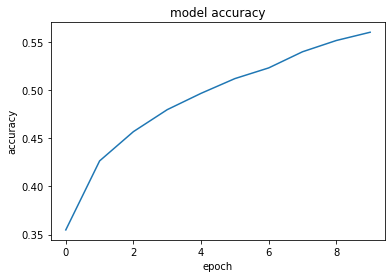

In [16]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

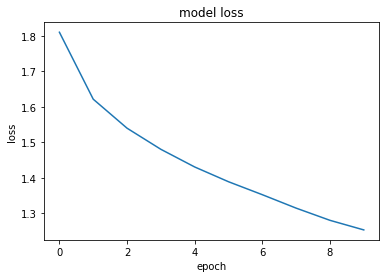

In [17]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#### Evaluate the model

In [18]:
model.evaluate(X_test_scaled,y_test_categorical)

313/313 [==============================] - 6s 17ms/step - loss: 1.3775 - accuracy: 0.5109 0s - loss: 1.3781 - 


[1.3775479793548584, 0.5109000205993652]

#### classification report

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test_scaled)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report")
print(classification_report(y_test,y_pred_classes))

Classification Report
              precision    recall  f1-score   support

           0       0.45      0.73      0.56      1000
           1       0.65      0.66      0.65      1000
           2       0.47      0.23      0.31      1000
           3       0.40      0.22      0.29      1000
           4       0.43      0.49      0.46      1000
           5       0.41      0.48      0.44      1000
           6       0.65      0.45      0.53      1000
           7       0.46      0.73      0.57      1000
           8       0.62      0.64      0.63      1000
           9       0.65      0.49      0.56      1000

    accuracy                           0.51     10000
   macro avg       0.52      0.51      0.50     10000
weighted avg       0.52      0.51      0.50     10000



#### Heatmap

Text(69.0, 0.5, 'Truth')

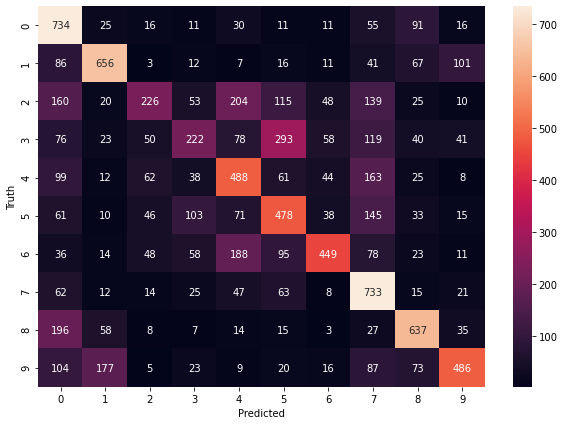

In [34]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_classes)
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')